In [167]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyvista as pv
from script.visualization_3D import visualize_TI_3D_pyvista
from script.multi_points_modeling import multi_points_modeling, multi_points_modeling_multi_scaled

TI = np.loadtxt('ti_strebelle.dat', skiprows = 3).reshape(250,250,1)
TI_3D = np.concatenate([TI for _ in range(64)], axis=2)  # (250, 250, 10)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# visulaization 3D training image
visualize_TI_3D_pyvista(TI_3D)

Widget(value='<iframe src="http://localhost:58942/index.html?ui=P_0x27679910e10_4&reconnect=auto" class="pyvis…

In [ ]:
##########################################
##  original demo for 64x64x16         ##
##########################################

random_seed = 7771
real_nx, real_ny, real_nz = 64, 64, 16
template_size = [5, 5, 5]
level_size = 2
n_level = 4
unique_facies = list(np.unique(TI_3D).astype(np.int8))
num_hard_data = 5

hard_data = pd.DataFrame({
'x': np.random.randint(0, real_nx//level_size**n_level, num_hard_data),
'y': np.random.randint(0, real_ny//level_size**n_level, num_hard_data),
'z': np.random.randint(0, real_nz//level_size**n_level, num_hard_data),
'facies': [unique_facies[np.random.randint(0, len(unique_facies))] for _ in range(num_hard_data)]
})

real = multi_points_modeling_multi_scaled(TI_3D, n_level, level_size, 
                                          template_size, random_seed, 
                                          real_nx, real_ny, real_nz, 
                                          hard_data, verbose = False)

In [ ]:
# 3D realization with hard data conditioning
visualize_TI_3D_pyvista(real)

In [231]:
##########################################
##  original demo for 64x64x1           ##
##########################################

random_seed = 7771
real_nx, real_ny, real_nz = 64, 64, 1
template_size = [5, 5, 1]
level_size = 2
n_level = 4
unique_facies = list(np.unique(TI).astype(np.int8))
num_hard_data = 5

hard_data = pd.DataFrame({
'x': np.random.randint(0, real_nx//level_size**n_level, num_hard_data),
'y': np.random.randint(0, real_ny//level_size**n_level, num_hard_data),
'z': [0 for _ in range(num_hard_data)],
'facies': [unique_facies[np.random.randint(0, len(unique_facies))] for _ in range(num_hard_data)]
})

# hard_data = pd.DataFrame({
# 'x': np.linspace(0, real_nx//level_size**n_level, num_hard_data),
# 'y': np.linspace(0, real_ny//level_size**n_level, num_hard_data),
# 'z': [0 for _ in range(num_hard_data)],
# 'facies': [unique_facies[np.random.randint(0, len(unique_facies))] for _ in range(num_hard_data)]
# })

real = multi_points_modeling_multi_scaled(TI, n_level, level_size, 
                                          template_size, random_seed, 
                                          real_nx, real_ny, real_nz, 
                                          hard_data, verbose = False)

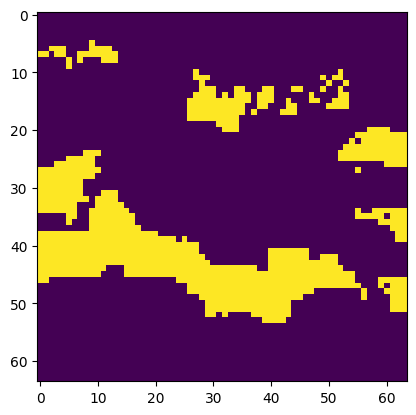

In [ ]:
# 2D realization with hard data conditioning 
plt.imshow(real[::level_size**n_level, ::level_size**n_level, :])

In [ ]:
##########################################
##  original demo for 64x64x1           ##
##########################################

random_seed = 7771
real_nx, real_ny, real_nz = 64, 64, 1
template_size = [5, 5, 1]
level_size = 2
n_level = 4

real = multi_points_modeling_multi_scaled(TI, n_level, level_size, 
                                          template_size, random_seed, 
                                          real_nx, real_ny, real_nz, 
                                          hard_data= None, verbose = False)

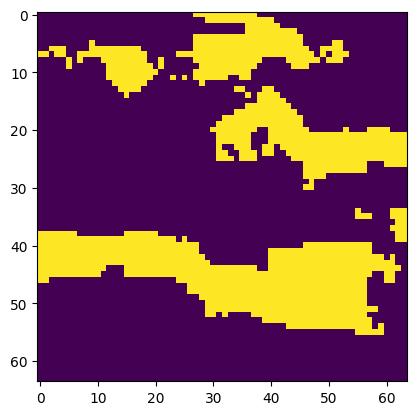

In [ ]:
# 2D realization without hard data conditioning
plt.imshow(real)

In [ ]:
plt.imshow(TI[:32, :32])

In [ ]:
soft_data = np.ones((32, 32, 1, 2))*-1
tau = 0.9
soft_data[...,0] = ((1-TI[:32,:32])*tau) + (1-tau)
soft_data[...,1] = (TI[:32,:32]*tau) + (1-tau)

In [ ]:
##########################################
##  original demo for 128x128x1         ##
##########################################

random_seed = 7771
n_real = 1
real_nx, real_ny, real_nz = 32, 32, 1
template_size = [5, 5, 1]

real = multi_points_modeling(TI, template_size, random_seed, real_nx, real_ny, real_nz, soft_data=soft_data)
plt.imshow(real)
plt.title(f'{random_seed}')